In [10]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.adx_atr_strategy import (
    AdxAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.boll_atr_strategy import (
    BollAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.cci_atr_strategy import (
    CciAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.cmo_atr_strategy import (
    CmoAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.donchian_atr_strategy import (
    DonchianAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.dema_atr_strategy import (
    DemaAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.ht_atr_strategy import (
    HtAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.kama_atr_strategy import (
    KamaAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.keltner_atr_strategy import (
    KeltnerAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.macd_atr_strategy import (
    MacdAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.keltner_atr_strategy import (
    KeltnerAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.rsi_atr_strategy import (
    RsiAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.sar_atr_strategy import (
    SarAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.tema_atr_strategy import (
    TemaAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.trima_atr_strategy import (
    TrimaAtrStrategy,
)

from vnpy.app.cta_strategy.strategies.boll_channel_strategy import (
    BollChannelStrategy,
)
from vnpy.app.cta_strategy.strategies.double_ma_strategy import (
    DoubleMaStrategy,
)
from vnpy.app.cta_strategy.strategies.dual_thrust_strategy import (
    DualThrustStrategy,
)
from vnpy.app.cta_strategy.strategies.king_keltner_strategy import (
    KingKeltnerStrategy,
)
from vnpy.app.cta_strategy.strategies.multi_timeframe_strategy import (
    MultiTimeframeStrategy,
)
from vnpy.app.cta_strategy.strategies.turtle_signal_strategy import (
    TurtleSignalStrategy,
)
from datetime import datetime

In [15]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="ETHUSD.BITMEX",
    interval="1m",
    start=datetime(2019, 7, 21),
    end=datetime(2019, 9, 11),
    rate=0.001 * 0.0,
    slippage=0.05,
    size=1,
    pricetick=0.05,
    capital=1_000_000,
)
engine.add_strategy(CmoAtrStrategy, dict(reverse=False))

2019-09-11 16:03:33.996755	开始加载历史数据
2019-09-11 16:03:33.997724	加载进度：[58%]
2019-09-11 16:03:33.997724	加载进度：[100%]
2019-09-11 16:03:33.998722	历史数据加载完成，数据量：74882
2019-09-11 16:03:34.473881	策略初始化完成
2019-09-11 16:03:34.473881	开始回放历史数据
2019-09-11 16:03:37.835530	历史数据回放结束
2019-09-11 16:03:37.835530	开始计算逐日盯市盈亏
2019-09-11 16:03:37.839530	逐日盯市盈亏计算完成
2019-09-11 16:03:37.839530	开始计算策略统计指标
2019-09-11 16:03:37.847499	------------------------------
2019-09-11 16:03:37.847499	首个交易日：	2019-07-31
2019-09-11 16:03:37.848499	最后交易日：	2019-09-11
2019-09-11 16:03:37.848499	总交易日：	43
2019-09-11 16:03:37.848499	盈利交易日：	19
2019-09-11 16:03:37.848499	亏损交易日：	23
2019-09-11 16:03:37.848499	起始资金：	1,000,000.00
2019-09-11 16:03:37.848499	结束资金：	996,410.00
2019-09-11 16:03:37.848499	总收益率：	-0.36%
2019-09-11 16:03:37.848499	年化收益：	-2.00%
2019-09-11 16:03:37.848499	最大回撤: 	-3,975.00
2019-09-11 16:03:37.848499	百分比最大回撤: -0.40%
2019-09-11 16:03:37.848499	总盈亏：	-3,590.00
2019-09-11 16:03:37.848499	总手续费：	0.00
2019-09-11 16:03:37.84849

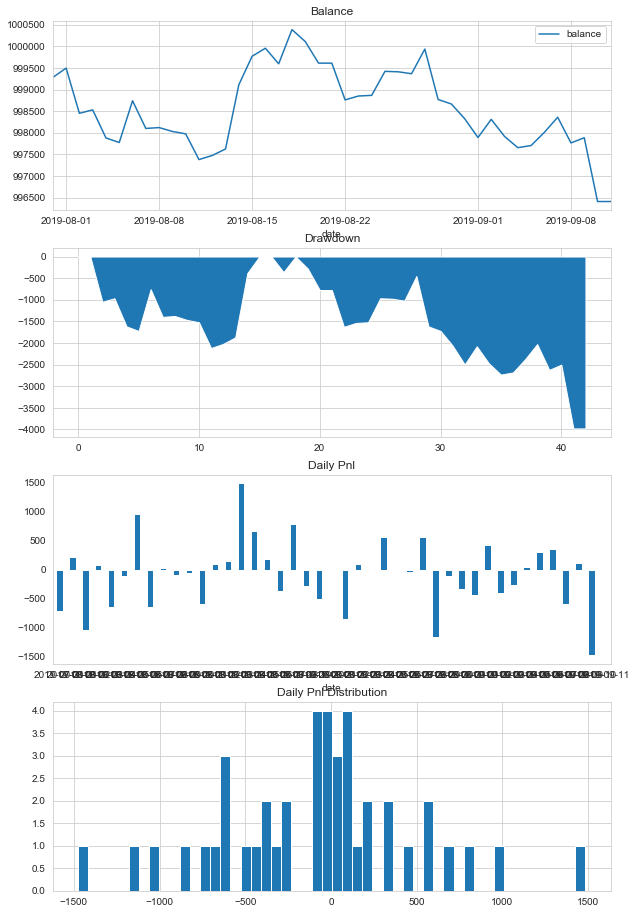

In [16]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
# setting.set_target("sharpe_ratio")
setting.set_target("end_balance")
setting.add_parameter("atr_length", 3, 39, 1)
setting.add_parameter("atr_ma_length", 10, 30, 1)
setting.add_parameter("rsi_length", 3, 20, 1)

engine.run_ga_optimization(setting, 10, 10)

In [4]:
engine.get_all_trades()

[TradeData(gateway_name='BACKTESTING', symbol='ETHUSD', exchange=<Exchange.BITMEX: 'BITMEX'>, orderid='1', tradeid='1', direction=<Direction.LONG: '多'>, offset=<Offset.OPEN: '开'>, price=210.15, volume=100, time='00:08:00'),
 TradeData(gateway_name='BACKTESTING', symbol='ETHUSD', exchange=<Exchange.BITMEX: 'BITMEX'>, orderid='2', tradeid='2', direction=<Direction.SHORT: '空'>, offset=<Offset.CLOSE: '平'>, price=211.65, volume=100, time='03:34:00'),
 TradeData(gateway_name='BACKTESTING', symbol='ETHUSD', exchange=<Exchange.BITMEX: 'BITMEX'>, orderid='3', tradeid='3', direction=<Direction.SHORT: '空'>, offset=<Offset.OPEN: '开'>, price=211.8, volume=100, time='03:35:00'),
 TradeData(gateway_name='BACKTESTING', symbol='ETHUSD', exchange=<Exchange.BITMEX: 'BITMEX'>, orderid='4', tradeid='4', direction=<Direction.LONG: '多'>, offset=<Offset.CLOSE: '平'>, price=213.3, volume=100, time='05:44:00'),
 TradeData(gateway_name='BACKTESTING', symbol='ETHUSD', exchange=<Exchange.BITMEX: 'BITMEX'>, orderid=